# Exploratory Data Analysis
## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

 - **Most common words** - find these and create word clouds
 - **Size of vocabulary** - look number of unique words and also how quickly someone speaks
 - **Amount of profanity** - most common terms

## Most common word

### Analysis

    - Press

In [21]:
# Read in the document-term matrix
import pandas as pd

data_press = pd.read_pickle('./data/pickle/press_dtm.pkl')
data_press = data_press.transpose()
data_press.head()

# Find the top 30 words said by each press
top_dict = {}
for c in data_press.columns:
    top = data_press[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{'Billboard Magazine': [('sound', 4),
  ('soul', 3),
  ('musical', 2),
  ('set', 2),
  ('fans', 2),
  ('cuts', 2),
  ('bowie', 2),
  ('raucous', 1),
  ('best', 1),
  ('john', 1),
  ('bowies', 1),
  ('guest', 1),
  ('open', 1),
  ('expect', 1),
  ('nearly', 1),
  ('weeks', 1),
  ('sounds', 1),
  ('universe', 1),
  ('included', 1),
  ('handling', 1),
  ('david', 1),
  ('millington', 1),
  ('soulful', 1),
  ('backup', 1),
  ('touch', 1),
  ('strained', 1),
  ('music', 1),
  ('works', 1),
  ('rockers', 1),
  ('big', 1)],
 'Circus Magazine': [('maslin', 18),
  ('bowie', 17),
  ('station', 15),
  ('slick', 14),
  ('bowies', 14),
  ('like', 14),
  ('hes', 13),
  ('says', 12),
  ('think', 12),
  ('just', 12),
  ('song', 11),
  ('sound', 11),
  ('album', 10),
  ('americans', 8),
  ('know', 8),
  ('new', 7),
  ('young', 7),
  ('time', 7),
  ('way', 7),
  ('david', 7),
  ('guitar', 6),
  ('things', 6),
  ('word', 6),
  ('songs', 6),
  ('late', 6),
  ('little', 5),
  ('soul', 5),
  ('dont', 5),
  

In [22]:
# Print the top 15 words said by each press
for press, top_words in top_dict.items():
    print(press)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')


Billboard Magazine
sound, soul, musical, set, fans, cuts, bowie, raucous, best, john, bowies, guest, open, expect
---
Circus Magazine
maslin, bowie, station, slick, bowies, like, hes, says, think, just, song, sound, album, americans
---
Creem
bowie, sane, aladdin, better, like, star, david, bowies, album, past, good, does, song, just
---
Disc Magazine
album, bowie, bowies, comes, big, right, far, rebel, hes, sweet, mood, dogs, rats, thing
---
Disc and Music Echo
like, going, sound, bowie, managed, disbelievers, amazing, david, beatles, talented, trip, sounds, sounding, really
---
Guardian
reality, bowie, bowies, does, day, album, like, star, rock, old, final, just, high, satisfying
---
Melody Maker
bowie, like, im, david, says, time, album, just, rock, people, thats, new, hes, world
---
Miller Freeman Ent.
bowie, says, earthling, album, little, walker, new, wonder, musical, record, bowies, drum, eno, single
---
New Musical Express
bowie, album, like, just, time, im, david, man, know, d

In [23]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data_press.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['sound',
 'soul',
 'musical',
 'set',
 'fans',
 'cuts',
 'bowie',
 'raucous',
 'best',
 'john',
 'bowies',
 'guest',
 'open',
 'expect',
 'nearly',
 'weeks',
 'sounds',
 'universe',
 'included',
 'handling',
 'david',
 'millington',
 'soulful',
 'backup',
 'touch',
 'strained',
 'music',
 'works',
 'rockers',
 'big',
 'maslin',
 'bowie',
 'station',
 'slick',
 'bowies',
 'like',
 'hes',
 'says',
 'think',
 'just',
 'song',
 'sound',
 'album',
 'americans',
 'know',
 'new',
 'young',
 'time',
 'way',
 'david',
 'guitar',
 'things',
 'word',
 'songs',
 'late',
 'little',
 'soul',
 'dont',
 'thats',
 'im',
 'bowie',
 'sane',
 'aladdin',
 'better',
 'like',
 'star',
 'david',
 'bowies',
 'album',
 'past',
 'good',
 'does',
 'song',
 'just',
 'drive',
 'live',
 'time',
 'ronson',
 'turn',
 'love',
 'prettiest',
 'buddy',
 'work',
 'man',
 'cracked',
 'left',
 'musical',
 'rolling',
 'present',
 'actor',
 'album',
 'bowie',
 'bowies',
 'comes',
 'big',
 'right',
 'far',
 'rebel',
 'hes',
 '

In [24]:
Counter(words).most_common()

[('bowie', 17),
 ('like', 15),
 ('bowies', 14),
 ('album', 13),
 ('just', 12),
 ('david', 11),
 ('new', 10),
 ('man', 10),
 ('rock', 10),
 ('hes', 9),
 ('time', 9),
 ('songs', 8),
 ('im', 7),
 ('song', 6),
 ('way', 6),
 ('years', 6),
 ('sound', 5),
 ('dont', 5),
 ('star', 5),
 ('work', 5),
 ('pop', 5),
 ('ive', 5),
 ('musical', 4),
 ('best', 4),
 ('music', 4),
 ('little', 4),
 ('thats', 4),
 ('right', 4),
 ('great', 4),
 ('really', 4),
 ('big', 3),
 ('says', 3),
 ('think', 3),
 ('guitar', 3),
 ('things', 3),
 ('good', 3),
 ('does', 3),
 ('love', 3),
 ('sense', 3),
 ('york', 3),
 ('make', 3),
 ('albums', 3),
 ('year', 3),
 ('theres', 3),
 ('dance', 3),
 ('roll', 3),
 ('got', 3),
 ('heathen', 3),
 ('soul', 2),
 ('sounds', 2),
 ('station', 2),
 ('know', 2),
 ('live', 2),
 ('rebel', 2),
 ('dogs', 2),
 ('thing', 2),
 ('diamond', 2),
 ('reality', 2),
 ('day', 2),
 ('people', 2),
 ('id', 2),
 ('world', 2),
 ('record', 2),
 ('eno', 2),
 ('single', 2),
 ('ideas', 2),
 ('heroes', 2),
 ('come', 2

In [25]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['bowie',
 'like',
 'bowies',
 'album',
 'just',
 'david',
 'new',
 'man',
 'rock',
 'hes',
 'time',
 'songs',
 'im']

In [33]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('./data/pickle/press.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.texte)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("./data/pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("./data/pickle/press_dtm_stop.pkl")

In [32]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

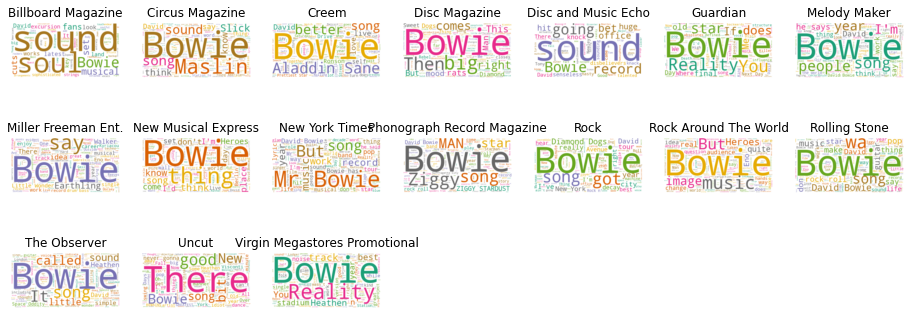

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

press_name = ['Billboard Magazine', 'Circus Magazine', 'Creem', 'Disc Magazine', 'Disc and Music Echo', 'Guardian',
              'Melody Maker', 'Miller Freeman Ent.', 'New Musical Express', 'New York Times', 'Phonograph Record Magazine', 'Rock', 'Rock Around The World', 'Rolling Stone', 'The Observer', 'Uncut', 'Virgin Megastores Promotional']

for index, press in enumerate(data_press.columns):
    wc.generate(data_clean.texte[index])

    plt.subplot(3, 7, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(press_name[index])

plt.show()